<a href="https://colab.research.google.com/github/MwikaliDev/DataScience_project/blob/main/simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:

#import dataset
# to load a dataset in Google Colab if the file is located in the local drive
from google.colab import files
uploaded = files.upload()


Saving CHILD HEALTH DATA -age_weight.xlsx to CHILD HEALTH DATA -age_weight.xlsx


In [3]:

#read the dataset
#data = pd.read_excel > when the file is in excel
#data = pd.read_csv > when the file is in csv
data = pd.read_excel('CHILD HEALTH DATA -age_weight.xlsx')


In [4]:
#view a few rows to see how the data looks like using the head() function
data.head()

,Child's weight (kilograms),Age (months)
0,16.2,45.0
1,13.5,45.0
2,13.4,36.0
3,15.0,51.0
4,15.2,56.0


In [5]:
#check if the data contained in our columns contains any missing values by using the isnull() function and the sum() function
data.isnull().sum()

,0
Child's weight (kilograms),65
Age (months),28


In [7]:
#NOTE: incase the weight column had for example, 65 missing values and the age column had like 28, we could remove the null values from our dataset using the pandas dropna()function.
data.dropna(inplace=True)



In [8]:
#to know the shape of the dataset
data.shape


(799, 2)

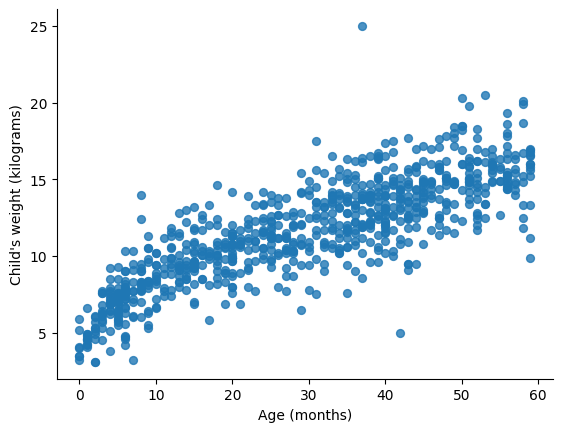

In [9]:
# Creating a Scatter plot
data.plot(kind='scatter', x="Age (months)", y="Child's weight (kilograms)", s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
#checking if there is missing data
data.isnull().sum()

,0
Child's weight (kilograms),0
Age (months),0


In [11]:
#Creating x and y values
# X: indepedent variable
# y: dependant variable
x=data[["Age (months)"]]
y=data[["Child's weight (kilograms)"]]



In [12]:
#creating the model
model=linear_model.LinearRegression()


In [13]:
#splitting the data into 70% training and 30% testing
x_train,x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=42)


In [14]:
#check the shape of the x_train and y_train sets
print(x_train.shape)
print(y_train.shape)

(559, 1)
(559, 1)


In [15]:
#check the shape of the x_test and y_test sets
print(x_test.shape)
print(y_test.shape)

(240, 1)
(240, 1)


In [16]:
#train the algorithm using the x_train and the y_train data using the function called fit
model.fit(x_train,y_train)


LinearRegression()

In [17]:
#predict the data it has not seen saved in the x_test variable using the predict() function.
y_pred=model.predict(x_test)


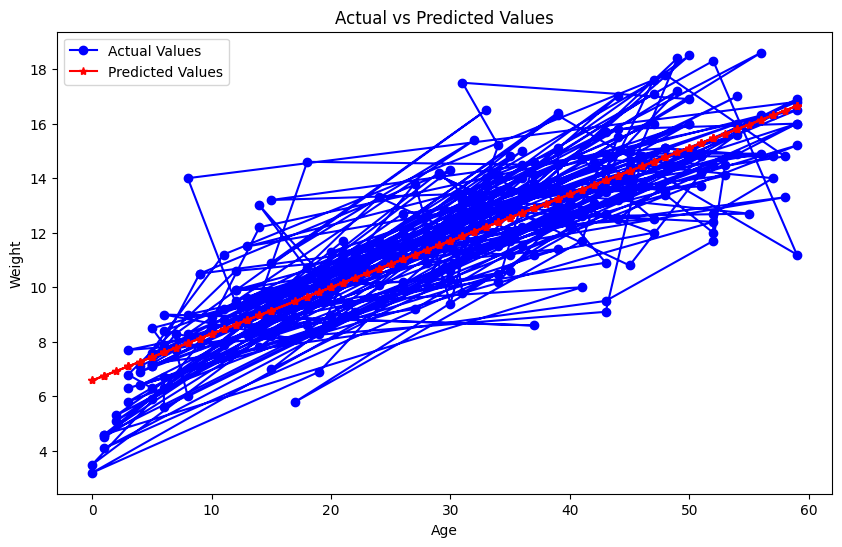

In [18]:
#comparing predicted values with the actual values saved in the y_test.
#plot the lines that show the predicted values and the actual values using the matplotlib library
plt.figure(figsize=(10, 6))
plt.plot(x_test, y_test, label='Actual Values', color='blue', marker='o')
# Plot predicted values
plt.plot(x_test, y_pred, label='Predicted Values', color='red', marker='*')
# Set labels and title
plt.xlabel('Age')
plt.ylabel('Weight')
plt.title('Actual vs Predicted Values')
# Add a legend
plt.legend()
# Show the plot
plt.show()

In [19]:
#calculate the value of the intercept
model.intercept_


array([6.58567429])

In [20]:
#calculate the value of the slope(coefficient)
model.coef_


array([[0.17056572]])

In [21]:
#use the created model to predict the weight of of a new baby
#for example, lets say for a baby who is 12 months old.
#We will use the predict() function
predicted_weigtht= model.predict([[12]])
print(predicted_weigtht)



[[8.63246291]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [22]:
#evaluate the created model
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("Mean squared error")
print(mean_squared_error(y_test,y_pred))
print("R_squared")
print(r2_score(y_test,y_pred))
print("Mean absolute error")
print(mean_absolute_error(y_test,y_pred))
print("Root Mean squared error")
print(mean_squared_error(y_test, y_pred))


Mean squared error
3.4209133586369727
R_squared
0.6899247712879044
Mean absolute error
1.4329495276999893
Root Mean squared error
3.4209133586369727
